In [ ]:
! pip install -q --upgrade google-generativeai langchain-google-genai chromadb pypdf


In [66]:
from IPython.display import display
from IPython.display import Markdown
import textwrap


def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

In [67]:
import google.generativeai as genai
from google.colab import userdata

In [68]:
import os
GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')
genai.configure(api_key=GOOGLE_API_KEY)

### Text Generation

In [69]:
model = genai.GenerativeModel(model_name = "gemini-pro")
model

 genai.GenerativeModel(
   model_name='models/gemini-pro',
   generation_config={}.
   safety_settings={}
)

In [70]:
response = model.generate_content("What are the usecases of LLMs?")

In [71]:
to_markdown(response.text)

> 1. **Language Translation:** LLMs can translate text from one language to another. This can be useful for businesses that operate in multiple countries or for people who want to read articles or watch videos in different languages.
> 
> 2. **Chatbots and Customer Service:** LLMs can be used to create chatbots that can answer customer questions and provide support. This can help businesses save money on customer service costs and improve the customer experience.
> 
> 3. **Text Summarization:** LLMs can summarize text, which can be useful for people who want to quickly get the main points of a long article or document.
> 
> 4. **Content Generation:** LLMs can generate text, including articles, blog posts, and social media posts. This can be useful for businesses that need to create a lot of content or for people who want to create their own blog or website.
> 
> 5. **Code Generation:** LLMs can generate computer code, which can be useful for developers who want to quickly create simple programs or for people who want to learn how to code.
> 
> 6. **Poetry and Music Generation:** LLMs can generate poetry and music, which can be used for entertainment or for therapeutic purposes.
> 
> 7. **Research and Analysis:** LLMs can be used to analyze data and generate reports. This can be useful for businesses that need to make data-driven decisions or for researchers who want to gain insights from their data.
> 
> 8. **Creative Writing:** LLMs can be used to generate creative writing, such as stories, poems, and songs. This can be useful for writers who want to explore new ideas or for people who just want to have fun.
> 
> 9. **Education and Training:** LLMs can be used to create educational materials, such as textbooks, lesson plans, and quizzes. This can be useful for teachers who want to improve the learning experience for their students.
> 
> 10. **Healthcare and Medicine:** LLMs can be used to generate patient records, analyze medical data, and even develop new drugs. This can be useful for doctors who want to provide better care for their patients.

### Use LangChain to Access Gemini API

In [72]:
from langchain_google_genai import ChatGoogleGenerativeAI


In [73]:
llm = ChatGoogleGenerativeAI(model="gemini-pro",google_api_key=GOOGLE_API_KEY)

In [74]:
result = llm.invoke("What are the usecases of LLMs?")


In [75]:
to_markdown(result.content)

> 1. **Language Generation:** 
> - Text Summarization: LLMs can be used to summarize large bodies of text, such as research papers, news articles, or legal documents, into a concise and informative summary. 
> - Article Writing: LLMs can be used to generate articles, blog posts, and other written content on a wide range of topics. 
> - Report Generation: LLMs can be used to generate reports, such as financial reports, market research reports, and scientific reports, based on data and information provided.
> - Creative Writing: LLMs can be used to generate creative content, such as stories, poems, and song lyrics. 
> 
> 
> 2. **Code Generation:** 
> - Code Completion: LLMs can be used to automatically complete lines of code, helping programmers write code faster and more efficiently.  
> - Bug Fixing: LLMs can be used to detect and fix bugs in code, reducing the time and effort required for debugging. 
> - Code Generation: LLMs can be used to generate entire code functions or even complete programs based on natural language instructions or specifications.
> 
> 
> 3. **Natural Language Processing (NLP):** 
> - Machine Translation: LLMs can be used to translate text from one language to another, providing high-quality and accurate translations.  
> - Text Classification: LLMs can be used to classify text into predefined categories, such as spam, sentiment, or topic.  
> - Named Entity Recognition (NER): LLMs can be used to identify and extract named entities, such as people, places, and organizations, from text. 
> - Question Answering: LLMs can be used to answer questions based on a given context or knowledge base, providing informative and comprehensive responses. 
> 
> 
> 4. **Customer Service:** 
> - Chatbots: LLMs can be used to build chatbots that can engage in natural language conversations with customers, answering questions, providing support, and resolving issues. 
> - Language Understanding: LLMs can be used to improve the language understanding capabilities of customer service systems, enabling them to better interpret customer inquiries and provide appropriate responses. 
> 
> 
> 5. **Education:**
> - Language Learning: LLMs can be used to help people learn new languages by providing interactive language lessons, translations, and feedback on pronunciation and grammar.  
> - Homework and Assignment Help: LLMs can be used to help students with their homework and assignments by providing explanations, examples, and solutions to problems. 
> 
> 
> 6. **Healthcare:** 
> - Medical Diagnosis: LLMs can be used to help doctors diagnose diseases and conditions by analyzing patient data, such as symptoms, medical history, and test results.  
> - Treatment Planning: LLMs can be used to help doctors develop treatment plans for patients, taking into account their individual needs and preferences. 
> 
> 
> 7. **Finance and Business:** 
> - Financial Analysis: LLMs can be used to analyze financial data, such as stock prices, economic indicators, and company reports, to identify trends, make predictions, and inform investment decisions.  
> - Market Research: LLMs can be used to analyze market data, such as consumer behavior, competitor analysis, and industry trends, to provide insights for businesses to make informed decisions. 
> 
> 
> 8. **Legal:** 
> - Legal Research: LLMs can be used to help lawyers research legal cases, statutes, and regulations by analyzing large amounts of legal text and providing relevant information.  
> - Contract Analysis: LLMs can be used to analyze contracts for legal risks, compliance issues, and inconsistencies. 
> 
> 
> 9. **Entertainment:**  
> - Interactive Storytelling: LLMs can be used to create interactive stories and games where users can make choices that influence the narrative.  
> - Music Generation: LLMs can be used to generate unique and original music compositions in various genres.

### Gemini Pro Vision

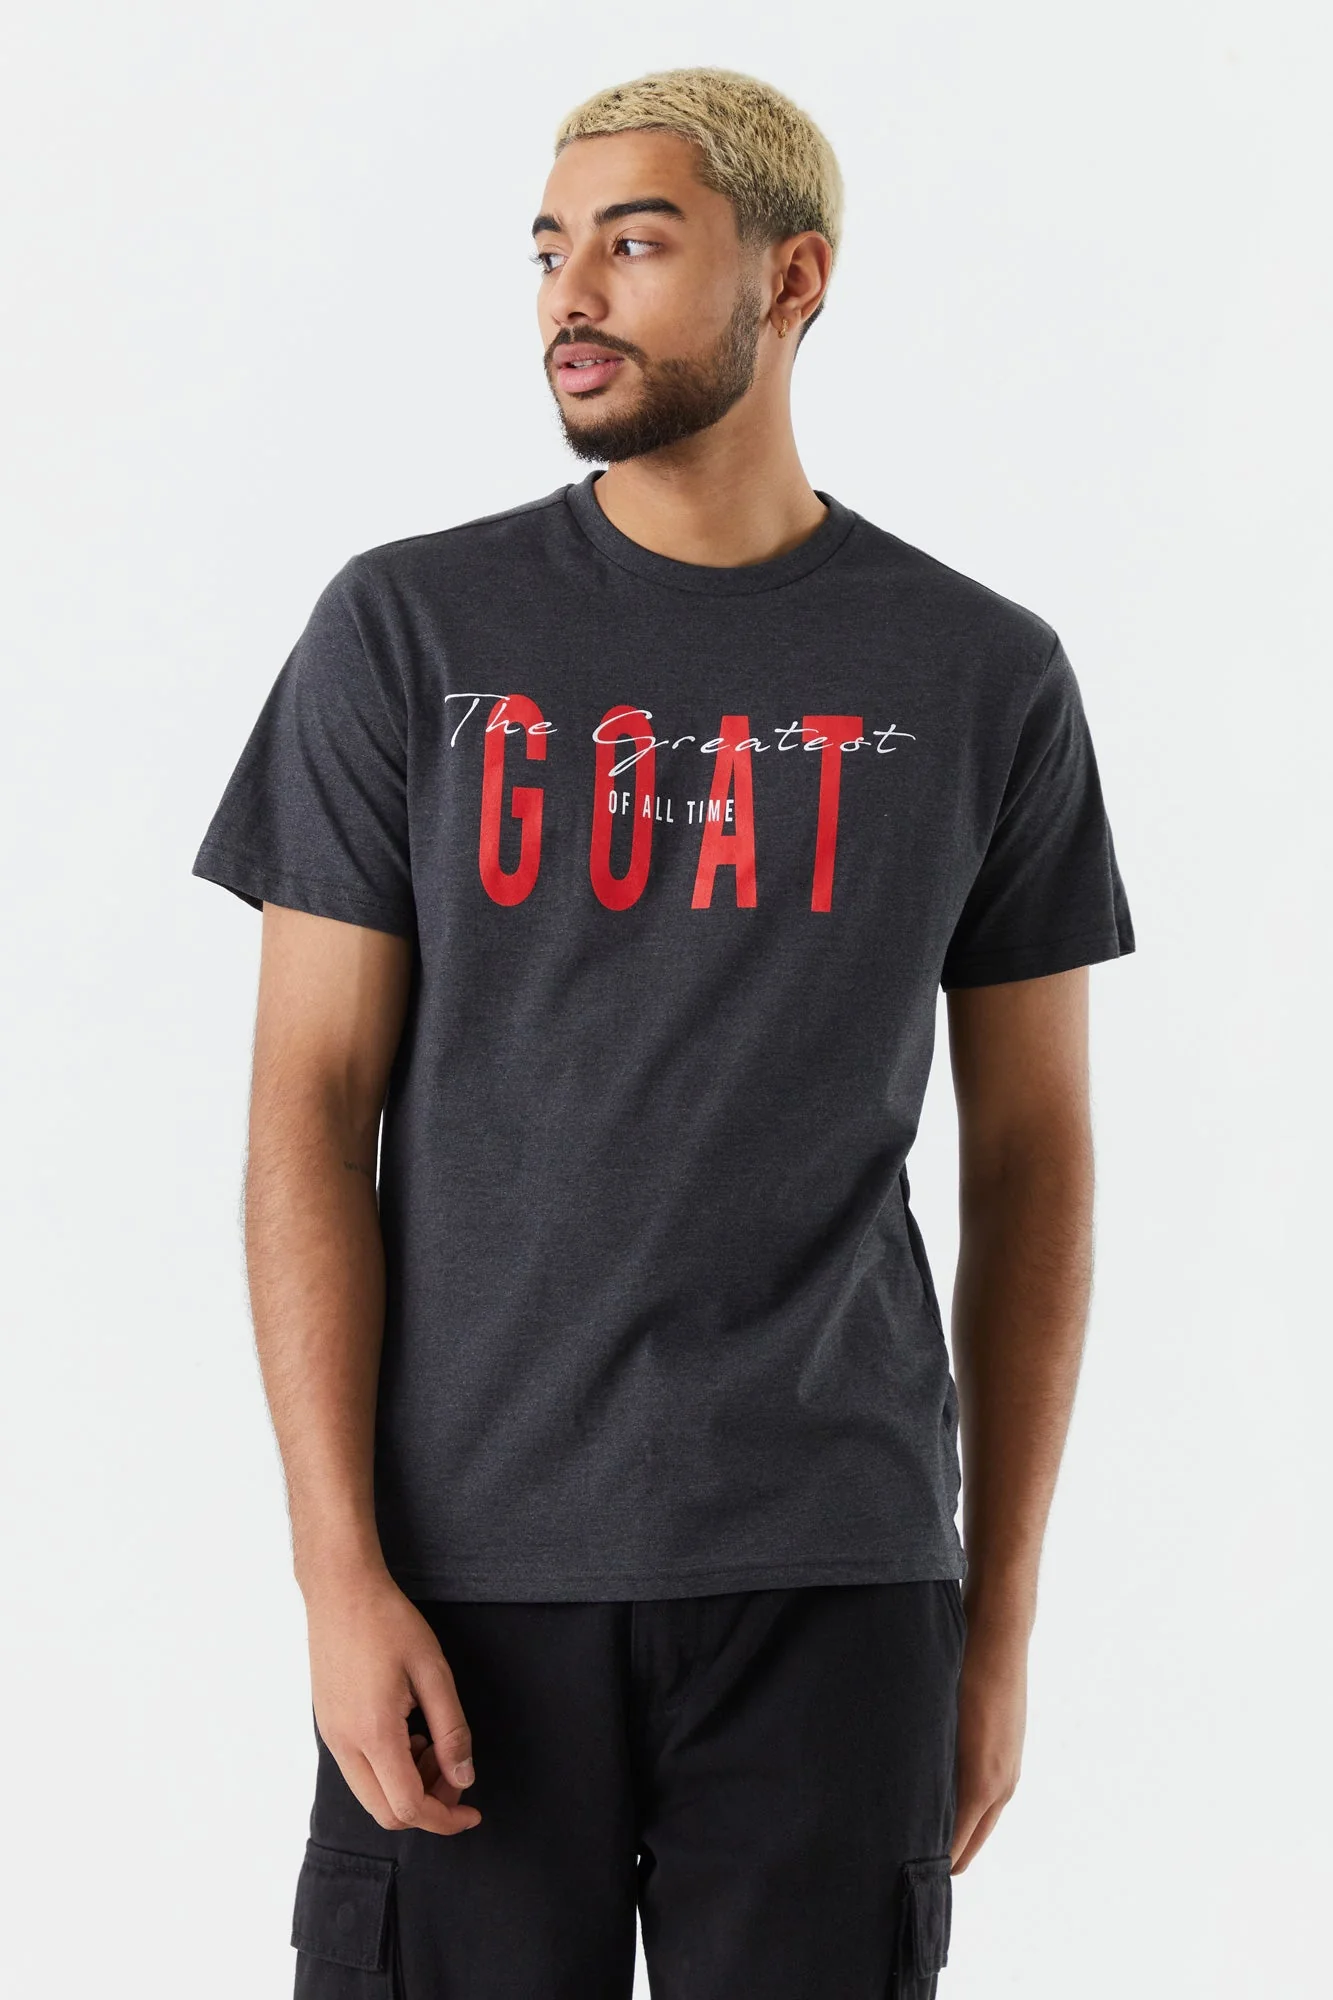

In [76]:
import PIL.Image

img = PIL.Image.open('image.jpg')
img


In [77]:
from langchain_core.messages import HumanMessage
from langchain_google_genai import ChatGoogleGenerativeAI

llm = ChatGoogleGenerativeAI(model="gemini-pro-vision",google_api_key=GOOGLE_API_KEY)
# example
message = HumanMessage(
    content=[
        {
            "type": "text",
            "text": "Write a short description about the product shown in the image for mentioning it on ecommerce website",
        },
        {"type": "image_url", "image_url": "/content/image.jpg"},
    ]
)
llm.invoke([message])

AIMessage(content=' This men\'s t-shirt is perfect for showing off your love of sports. The shirt is made of a soft and comfortable cotton blend, and features a bold and eye-catching design. The front of the shirt features the words "The Greatest of All Time" in large, red letters. The shirt is available in a variety of sizes, so you can find the perfect fit.')

## Chat with Documents using RAG (Retreival Augment Generation)

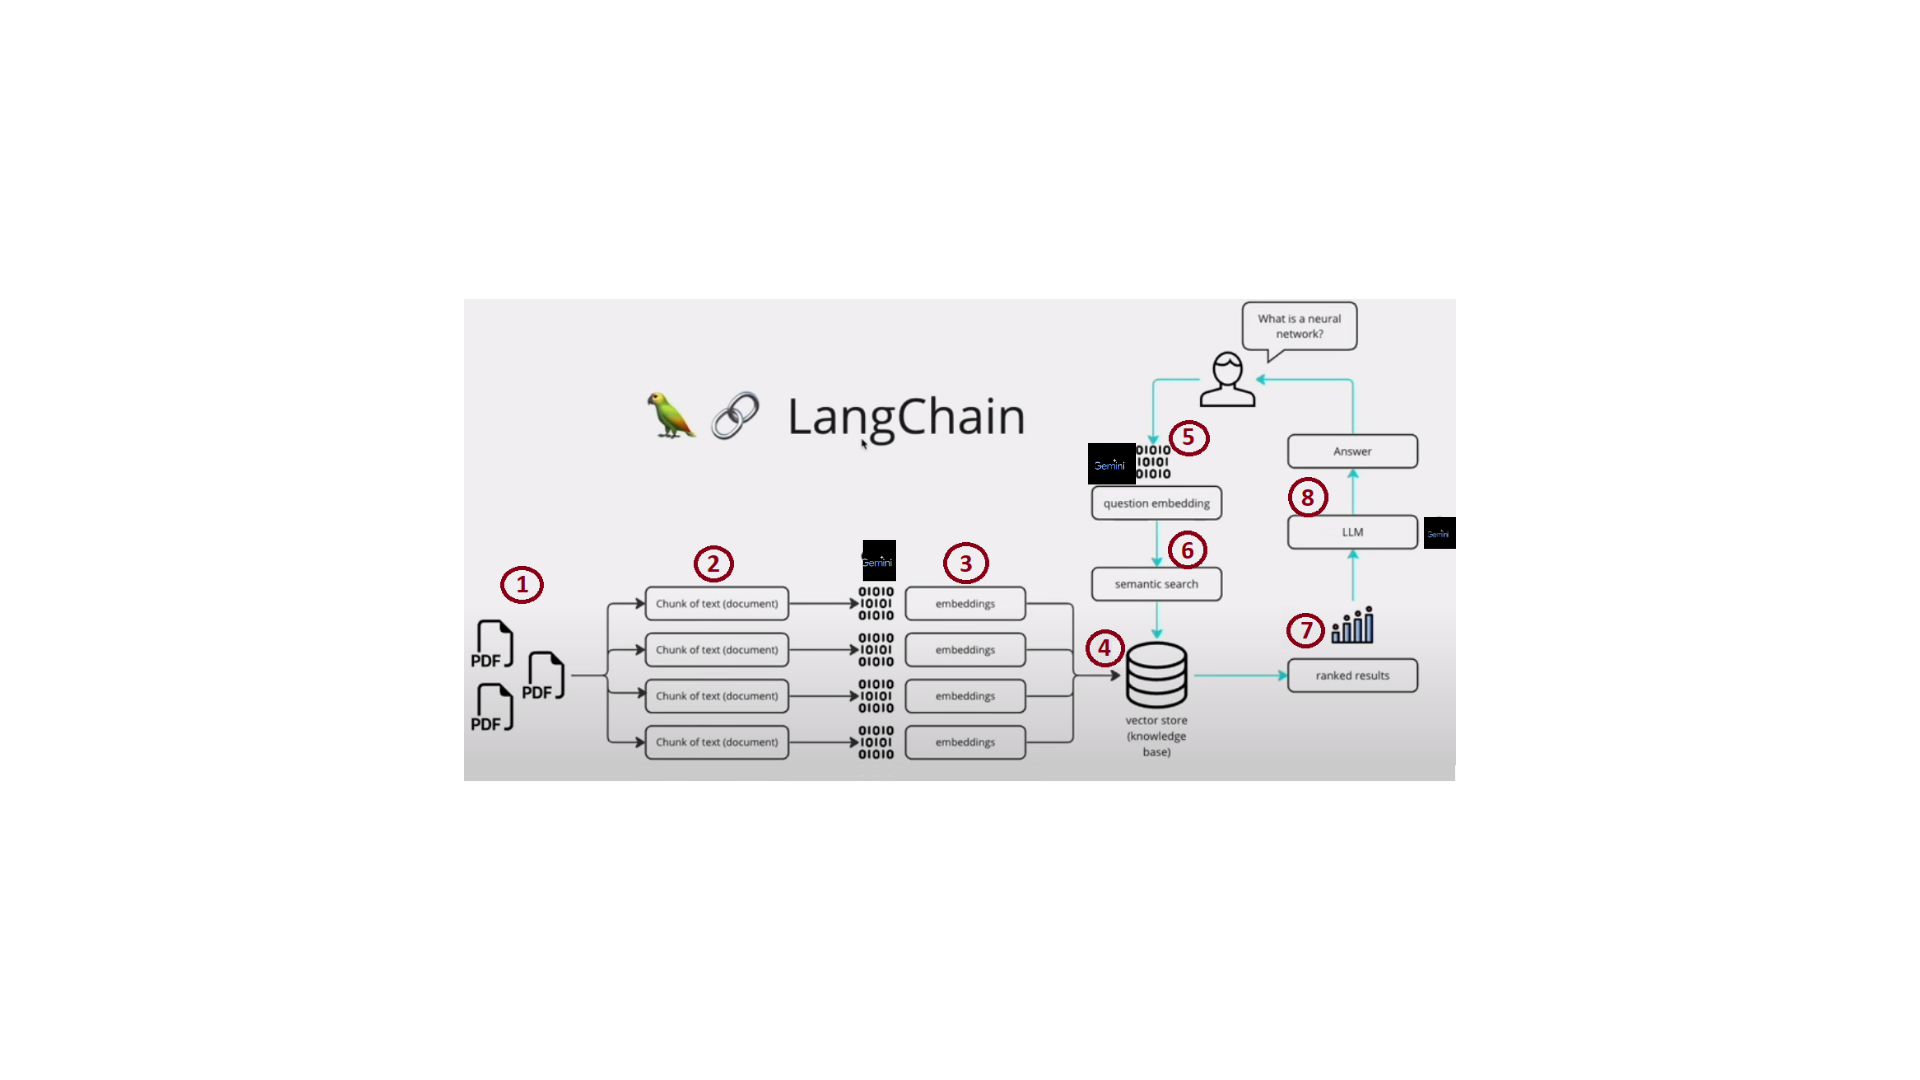

In [78]:
import PIL.Image

img = PIL.Image.open('/content/rag.png')
img

In [ ]:
!sudo apt -y -qq install tesseract-ocr libtesseract-dev

!sudo apt-get -y -qq install poppler-utils libxml2-dev libxslt1-dev antiword unrtf poppler-utils pstotext tesseract-ocr flac ffmpeg lame libmad0 libsox-fmt-mp3 sox libjpeg-dev swig

!pip install langchain

In [79]:
import urllib
import warnings
from pathlib import Path as p
from pprint import pprint

import pandas as pd
from langchain import PromptTemplate
from langchain.chains.question_answering import load_qa_chain
from langchain.document_loaders import PyPDFLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.vectorstores import Chroma
from langchain.chains import RetrievalQA



warnings.filterwarnings("ignore")
# restart python kernal if issues with langchain import.

In [80]:
from langchain_google_genai import ChatGoogleGenerativeAI


In [81]:
model = ChatGoogleGenerativeAI(model="gemini-pro",google_api_key=GOOGLE_API_KEY,
                             temperature=0.2,convert_system_message_to_human=True)


### Extract text from the PDF

In [82]:
pdf_loader = PyPDFLoader("/content/attention_is_all_you_need.pdf")
pages = pdf_loader.load_and_split()
print(pages[3].page_content)


Figure 1: The Transformer - model architecture.
The Transformer follows this overall architecture using stacked self-attention and point-wise, fully
connected layers for both the encoder and decoder, shown in the left and right halves of Figure 1,
respectively.
3.1 Encoder and Decoder Stacks
Encoder: The encoder is composed of a stack of N= 6 identical layers. Each layer has two
sub-layers. The first is a multi-head self-attention mechanism, and the second is a simple, position-
wise fully connected feed-forward network. We employ a residual connection [ 11] around each of
the two sub-layers, followed by layer normalization [ 1]. That is, the output of each sub-layer is
LayerNorm( x+ Sublayer( x)), where Sublayer( x)is the function implemented by the sub-layer
itself. To facilitate these residual connections, all sub-layers in the model, as well as the embedding
layers, produce outputs of dimension dmodel = 512 .
Decoder: The decoder is also composed of a stack of N= 6identical layers.

In [83]:
len(pages)

16

### RAG Pipeline: Embedding + Gemini (LLM)

In [84]:
from langchain_google_genai import GoogleGenerativeAIEmbeddings

In [85]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size=10000, chunk_overlap=1000)
context = "\n\n".join(str(p.page_content) for p in pages)
texts = text_splitter.split_text(context)

In [86]:
embeddings = GoogleGenerativeAIEmbeddings(model="models/embedding-001",google_api_key=GOOGLE_API_KEY)

In [87]:
vector_index = Chroma.from_texts(texts, embeddings).as_retriever(search_kwargs={"k":5})


In [88]:
qa_chain = RetrievalQA.from_chain_type(
    model,
    retriever=vector_index,
    return_source_documents=True

)

In [89]:
question = "Describe the Multi-head attention layer in detail?"
result = qa_chain({"query": question})
result["result"]

"The Multi-Head Attention layer is a key component of the Transformer architecture, which is a neural network model for sequence transduction tasks such as machine translation and text summarization. It allows the model to attend to different parts of the input sequence and combine information from different representation subspaces.\n\nThe Multi-Head Attention layer consists of several parallel attention layers, or heads, each of which performs attention on a different subspace of the input sequence. The outputs of these heads are then concatenated and projected to produce the final output of the layer.\n\nHere's a detailed explanation of how the Multi-Head Attention layer works:\n\n1. **Linear Projections:**\n   - The input sequence is first projected into three sets of matrices: queries (Q), keys (K), and values (V). These projections are learned linear transformations that map the input sequence to different representation subspaces.\n   - The dimensions of the Q, K, and V matrices

In [90]:
Markdown(result["result"])

The Multi-Head Attention layer is a key component of the Transformer architecture, which is a neural network model for sequence transduction tasks such as machine translation and text summarization. It allows the model to attend to different parts of the input sequence and combine information from different representation subspaces.

The Multi-Head Attention layer consists of several parallel attention layers, or heads, each of which performs attention on a different subspace of the input sequence. The outputs of these heads are then concatenated and projected to produce the final output of the layer.

Here's a detailed explanation of how the Multi-Head Attention layer works:

1. **Linear Projections:**
   - The input sequence is first projected into three sets of matrices: queries (Q), keys (K), and values (V). These projections are learned linear transformations that map the input sequence to different representation subspaces.
   - The dimensions of the Q, K, and V matrices are typically the same, and they are typically much smaller than the dimension of the input sequence.

2. **Scaled Dot-Product Attention:**
   - Each attention head computes a weighted sum of the values, where the weights are determined by the compatibility between the query and key vectors.
   - The compatibility between a query vector and a key vector is calculated using the scaled dot-product attention mechanism. This involves calculating the dot product between the query and key vectors, dividing the result by the square root of the dimension of the key vectors, and then applying a softmax function.
   - The softmax function ensures that the weights sum to 1, so that each value is assigned a probability distribution.

3. **Multi-Head Attention:**
   - The outputs of the individual attention heads are concatenated to form the output of the Multi-Head Attention layer.
   - This concatenation allows the model to attend to different parts of the input sequence and combine information from different representation subspaces.

4. **Final Projection:**
   - The concatenated output of the attention heads is then projected to produce the final output of the Multi-Head Attention layer.
   - This projection is a learned linear transformation that maps the concatenated output to a new representation space.

The Multi-Head Attention layer is a powerful mechanism that allows the Transformer model to attend to different parts of the input sequence and combine information from different representation subspaces. This enables the model to learn long-range dependencies and capture complex relationships within the input sequence.

In [91]:
result["source_documents"]

[Document(page_content='Attention Visualizations\nInput-Input Layer5\nIt\nis\nin\nthis\nspirit\nthat\na\nmajority\nof\nAmerican\ngovernments\nhave\npassed\nnew\nlaws\nsince\n2009\nmaking\nthe\nregistration\nor\nvoting\nprocess\nmore\ndifficult\n.\n<EOS>\n<pad>\n<pad>\n<pad>\n<pad>\n<pad>\n<pad>\nIt\nis\nin\nthis\nspirit\nthat\na\nmajority\nof\nAmerican\ngovernments\nhave\npassed\nnew\nlaws\nsince\n2009\nmaking\nthe\nregistration\nor\nvoting\nprocess\nmore\ndifficult\n.\n<EOS>\n<pad>\n<pad>\n<pad>\n<pad>\n<pad>\n<pad>\nFigure 3: An example of the attention mechanism following long-distance dependencies in the\nencoder self-attention in layer 5 of 6. Many of the attention heads attend to a distant dependency of\nthe verb ‘making’, completing the phrase ‘making...more difficult’. Attentions here shown only for\nthe word ‘making’. Different colors represent different heads. Best viewed in color.\n13\n\nInput-Input Layer5\nThe\nLaw\nwill\nnever\nbe\nperfect\n,\nbut\nits\napplication\nshould

In [92]:
template = """Use the following pieces of context to answer the question at the end. If you don't know the answer, just say that you don't know, don't try to make up an answer. Keep the answer as concise as possible. Always say "thanks for asking!" at the end of the answer.
{context}
Question: {question}
Helpful Answer:"""
QA_CHAIN_PROMPT = PromptTemplate.from_template(template)# Run chain
qa_chain = RetrievalQA.from_chain_type(
    model,
    retriever=vector_index,
    return_source_documents=True,
    chain_type_kwargs={"prompt": QA_CHAIN_PROMPT}
)


In [93]:
question = "Describe the Multi-head attention layer in detail?"
result = qa_chain({"query": question})
result["result"]

'The Multi-Head Attention layer is a key component of the Transformer architecture, which is a neural network model for sequence transduction tasks. It allows the model to attend to different parts of the input sequence and combine the information from these parts to generate an output.\n\nThe Multi-Head Attention layer consists of several attention heads, each of which performs a scaled dot-product attention operation. In the scaled dot-product attention operation, the queries, keys, and values are first projected to lower dimensions using linear transformations. The queries and keys are then used to compute a compatibility score for each key-value pair. The compatibility scores are then scaled by a factor of the square root of the dimension of the queries and keys, and a softmax function is applied to obtain the attention weights. The attention weights are then used to compute a weighted sum of the values, which is the output of the attention head.\n\nThe outputs of the different att

In [94]:
Markdown(result["result"])

The Multi-Head Attention layer is a key component of the Transformer architecture, which is a neural network model for sequence transduction tasks. It allows the model to attend to different parts of the input sequence and combine the information from these parts to generate an output.

The Multi-Head Attention layer consists of several attention heads, each of which performs a scaled dot-product attention operation. In the scaled dot-product attention operation, the queries, keys, and values are first projected to lower dimensions using linear transformations. The queries and keys are then used to compute a compatibility score for each key-value pair. The compatibility scores are then scaled by a factor of the square root of the dimension of the queries and keys, and a softmax function is applied to obtain the attention weights. The attention weights are then used to compute a weighted sum of the values, which is the output of the attention head.

The outputs of the different attention heads are then concatenated and projected to the original dimension using a linear transformation. This results in the final output of the Multi-Head Attention layer.

The Multi-Head Attention layer allows the model to attend to different parts of the input sequence and combine the information from these parts in different ways. This makes it a powerful tool for learning long-range dependencies in the input sequence.

Here is a more detailed explanation of the steps involved in the Multi-Head Attention layer:

1. **Linear projections:** The queries, keys, and values are first projected to lower dimensions using linear transformations. This is done to reduce the computational cost of the attention operation.
2. **Scaled dot-product attention:** The queries and keys are then used to compute a compatibility score for each key-value pair. The compatibility score is computed using a scaled dot-product operation, which is defined as follows:

```
Attention(Q, K, V) = softmax(QKT / sqrt(dk))V
```

where Q is the query matrix, K is the key matrix, V is the value matrix, and dk is the dimension of the queries and keys.

3. **Softmax:** The compatibility scores are then scaled by a factor of the square root of the dimension of the queries and keys, and a softmax function is applied to obtain the attention weights. The softmax function is defined as follows:

```
softmax(x) = exp(x) / sum(exp(x))
```

where x is a vector of values.

4. **Weighted sum:** The attention weights are then used to compute a weighted sum of the values, which is the output of the attention head. The weighted sum is computed as follows:

```
Output = Attention(Q, K, V)V
```

5. **Concatenation and projection:** The outputs of the different attention heads are then concatenated and projected to the original dimension using a linear transformation. This results in the final output of the Multi-Head Attention layer.

The Multi-Head Attention layer is a powerful tool for learning long-range dependencies in the input sequence. It is used in a variety of sequence transduction tasks, such as machine translation, text summarization, and question answering.
Thanks for asking!

In [95]:
question = "Describe Random forest?"
result = qa_chain({"query": question})
Markdown(result["result"])

I'm sorry, but this context does not mention anything about random forest, so I cannot answer this question from the provided context.
Thanks for asking!